In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [179]:
def sinkhorn(p, q, C, beta=0.01, eps=1e-12, max_iter=200, tol=1e-10, patience=10,):
    '''
    p, q - distributions
    C - cost matrix
    beta - regularization parameter 
    '''
    n, m = len(p), len(q)
    K = np.exp(-C / beta) 
#     K /= K.sum()
    Kt = K.T
    b = np.ones(m)
    err = [10]
    i = 0
    j = 0
    while i < max_iter:
        a = np.divide(p, K.dot(b))
        b = np.divide(q, Kt.dot(a))
        g = a.reshape(-1, 1) * K * b.reshape(1, -1) 
        err.append(np.linalg.norm(g.sum(0) - q) + np.linalg.norm(g.sum(1) - p))
        # if good enough
        if err[-1] < eps:
            print(f'#iterations={i+1}, early stopping: eps, err={err[-1]}')
            break
        # if no improvements
        if np.abs(err[-2] - err[-1]) < tol:
            j += 1
            if j > patience:
                print(f'#iterations={i+1}, early stopping: tol, err={err[-1]}')
                break
        else:
            j = 0
        i +=1
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.title('error')
    plt.semilogy(range(len(err)-1), err[1:])
    plt.subplot(122)
    plt.title('optimal transport matrix')
    plt.imshow(g)
    plt.show()
    
    return g, K, a, b

# 1D bins

In [268]:
X, Y = np.random.normal(-4, 2, (200, 1)), np.random.normal(4, 2, (150, 1))
n = 30

In [269]:
from scipy.stats import binned_statistic_dd, binned_statistic_2d, binned_statistic

centers = lambda edges: (edges[:-1] + edges[1:]) / 2

clouds = np.vstack([X, Y])
bins = centers(binned_statistic_dd(clouds.ravel(), np.zeros_like(clouds.ravel()), statistic='count', bins=n).bin_edges[0])
count = binned_statistic_dd(clouds.ravel(), np.zeros_like(clouds.ravel()), statistic='count', bins=n).statistic

binsX = binned_statistic_dd(clouds.ravel(), np.zeros_like(clouds.ravel()), statistic='count', bins=n).binnumber[:len(X)] - 1
binsY = binned_statistic_dd(clouds.ravel(), np.zeros_like(clouds.ravel()), statistic='count', bins=n).binnumber[-len(Y):] - 1

idbX, cX = np.unique(binsX, return_counts=True)
idbY, cY = np.unique(binsY, return_counts=True)

p = np.zeros(n)
p[idbX] = cX
p /= p.sum()

q = np.zeros(n)
q[idbY] = cY
q /= q.sum()

# p_xy = bins[idbX - 1]
# q_xy = bins[idbY - 1]
c = cdist(bins.reshape(-1,1), bins.reshape(-1,1))

Toeplitz : True


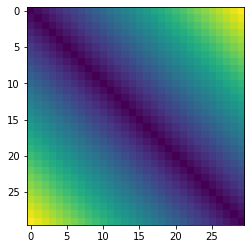

In [270]:
istoeplits = []
for i in range(len(c)-1):
    istoeplits.append((np.isclose(np.diag(c,i), np.diag(c,i)[0]).all()))
    
print('Toeplitz :', np.all(istoeplits))
plt.imshow(c)
plt.show()

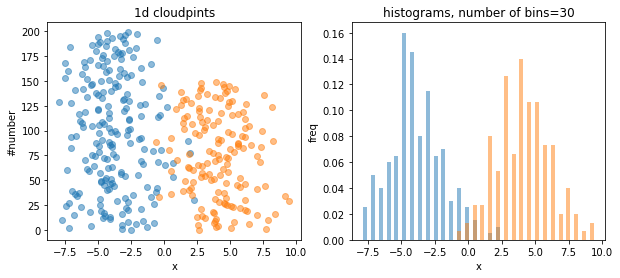

In [271]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('1d cloudpints')
plt.xlabel('x')
plt.ylabel('#number')
plt.scatter(X, range(len(X)), alpha=0.5)
plt.scatter(Y, range(len(Y)), alpha=0.5)
plt.subplot(122)
plt.title(f'histograms, number of bins={n}')
plt.xlabel('x')
plt.ylabel('freq')
plt.bar(bins, p, width=0.3, alpha=0.5, label='p')
plt.bar(bins, q, width=0.3, alpha=0.5, label='q')
plt.show()

In [272]:
p.shape, q.shape, c.shape

((30,), (30,), (30, 30))

In [273]:
p, q, bins

(array([0.025, 0.05 , 0.04 , 0.06 , 0.065, 0.16 , 0.145, 0.08 , 0.115,
        0.065, 0.07 , 0.03 , 0.04 , 0.025, 0.015, 0.   , 0.005, 0.01 ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00666667, 0.01333333, 0.02666667,
        0.02666667, 0.08      , 0.05333333, 0.12666667, 0.06666667,
        0.14      , 0.10666667, 0.10666667, 0.07333333, 0.07333333,
        0.02      , 0.04      , 0.02      , 0.00666667, 0.01333333]),
 array([-7.69822799, -7.11432091, -6.53041382, -5.94650674, -5.36259965,
        -4.77869257, -4.19478548, -3.6108784 , -3.02697131, -2.44306423,
        -1.85915714, -1.27525006, -0.69134297, -0.10743588,  0.4764712 ,
         1.06037829,  1.64428537,  2.22819246,  2.81209954,  3.39600663,
         3.97991371,  4.5638208 ,  5.14772788,  5.7316

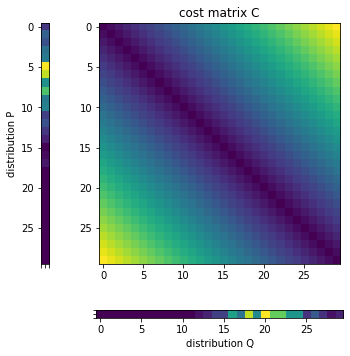

In [274]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.imshow(c)

# histogram on the attached axes
x_hist.imshow(q.reshape(1,-1))
y_hist.imshow(p.reshape(-1,1))
# y_hist.invert_yaxis()

main_ax.set_title('cost matrix C')
y_hist.set_ylabel('distribution P')
x_hist.set_xlabel('distribution Q')

plt.show()

#iterations=58, early stopping: tol, err=8.554561370324577e-17


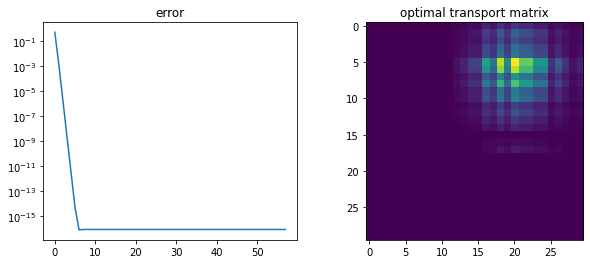

In [275]:
g, K, u, v = sinkhorn(p, q, c, 1, eps=1e-20, max_iter=2000, tol=1e-17, patience=50)

## another one 1d

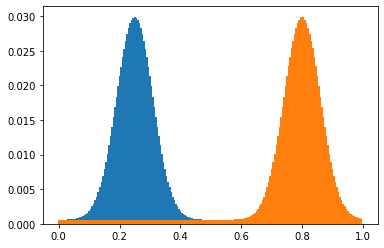

In [264]:
N = 200

t = np.arange(0,N)/N

Gaussian = lambda t0,sigma: np.exp(-(t-t0)**2/(2*sigma**2))
normalize = lambda p: p/np.sum(p)

sigma = .06;
a = Gaussian(.25,sigma)
b = Gaussian(.8,sigma)
vmin = .02;
a = normalize( a+np.max(a)*vmin)
b = normalize( b+np.max(b)*vmin)
plt.bar(t, a, width = 1/len(t))
plt.bar(t, b, width = 1/len(t))
plt.show()

Error=5.352991209463115e-10


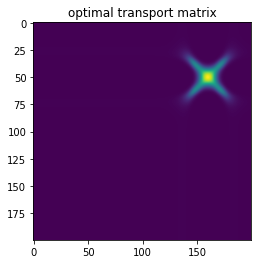

In [265]:
import ot
M = ot.dist(a.reshape(-1,1), b.reshape(-1,1))
# M = M /  M.max()
gamma = ot.sinkhorn(a, b, M, 5e-5)
print(f'Error={np.linalg.norm(gamma.sum(0) - b) + np.linalg.norm(gamma.sum(1) - a)}')
plt.imshow(gamma)
plt.title('optimal transport matrix')
plt.show()

#iterations=219, early stopping: tol, err=3.628003739694632e-16


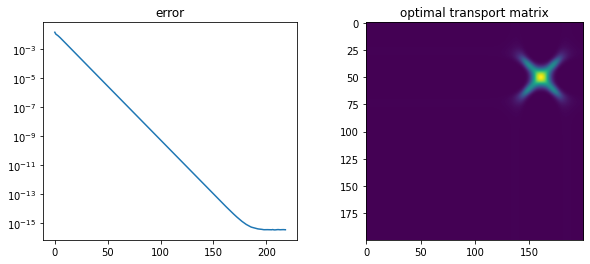

In [266]:
g, K, u, v = sinkhorn(a, b, M, 5e-5, eps=1e-20, max_iter=1000, tol=1e-15, patience=50)

# 2D bins

In [191]:
N, M, d = 200, 150, 2
X = np.random.normal(0, 3, (N, d))
Y = np.random.normal(10, 3, (M, d))

n, m = 7, 10

In [192]:
clouds = np.vstack([X, Y])

bins1 = centers(binned_statistic_dd(clouds, np.zeros_like(clouds), statistic='count', bins=(n, m)).bin_edges[0])
bins2 = centers(binned_statistic_dd(clouds, np.zeros_like(clouds), statistic='count', bins=(n, m)).bin_edges[1])
[x, y] = np.meshgrid(bins2, bins1, indexing='xy')
bins = np.hstack([x.reshape(-1,1), y[::-1].reshape(-1,1)])

c = cdist(bins, bins)

binsX = binned_statistic_dd(clouds, np.zeros_like(clouds), statistic='count', bins=(n, m), expand_binnumbers=True).binnumber[:,:len(X)] - 1
binsY = binned_statistic_dd(clouds, np.zeros_like(clouds), statistic='count', bins=(n, m), expand_binnumbers=True).binnumber[:,-len(Y):] - 1

idbX, cX = np.unique(binsX.T, return_counts=True, axis=0)
idbY, cY = np.unique(binsY.T, return_counts=True, axis=0)

In [193]:
p = np.zeros((n, m))
p[idbX[:,0], idbX[:,1]] = cX
p /= p.sum()

q = np.zeros((n, m))
q[idbY[:,0], idbY[:,1]] = cY
q /= q.sum()

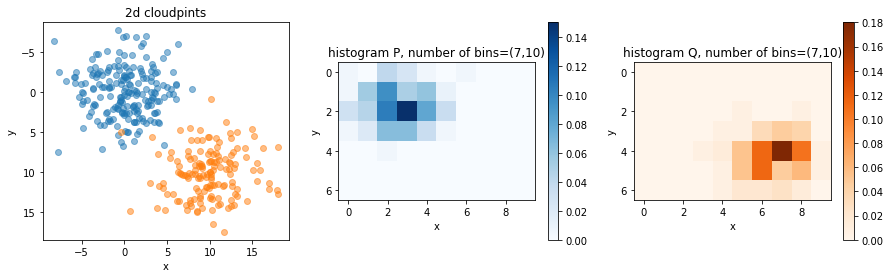

In [194]:
plt.figure(figsize=(15,4))
plt.subplot(131)
plt.title('2d cloudpints')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.scatter(Y[:,0], Y[:,1], alpha=0.5)
plt.ylim(max(X.max(), Y.max()) + 0.5, min(X.min(), Y.min()) - 0.5)
plt.subplot(132)
plt.title(f'histogram P, number of bins=({n},{m})')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(p, cmap='Blues')
plt.colorbar()
plt.subplot(133)
plt.title(f'histogram Q, number of bins=({n},{m})')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(q, cmap='Oranges')
plt.colorbar()
plt.show()

#iterations=106, early stopping: tol, err=9.157911839999924e-17


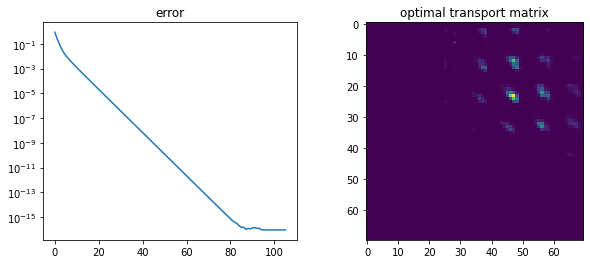

In [196]:
g, K, u, v = sinkhorn(p.ravel(), q.ravel(), c, 3e-1, eps=1e-20, max_iter=1000, tol=1e-17, patience=10)

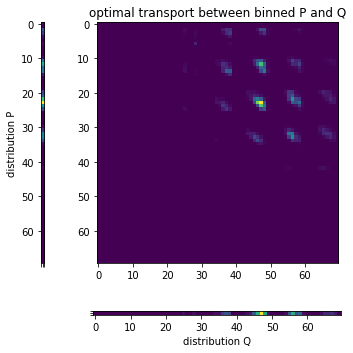

In [197]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.imshow(g)

# histogram on the attached axes
x_hist.imshow(q.reshape(1,-1))
x_hist.invert_yaxis()

y_hist.imshow(p.reshape(-1,1))
y_hist.invert_xaxis()

main_ax.set_title('optimal transport between binned P and Q')
y_hist.set_ylabel('distribution P')
x_hist.set_xlabel('distribution Q')

plt.show()

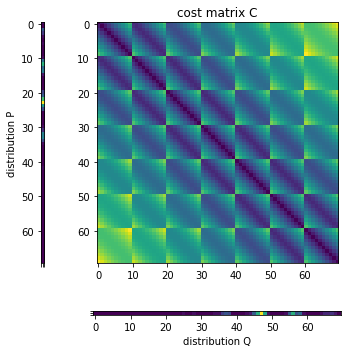

In [214]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.imshow(c)

# histogram on the attached axes
x_hist.imshow(q.reshape(1,-1))
x_hist.invert_yaxis()

y_hist.imshow(p.reshape(-1,1))
y_hist.invert_xaxis()

main_ax.set_title('cost matrix C')
y_hist.set_ylabel('distribution P')
x_hist.set_xlabel('distribution Q')

plt.show()

In [ ]:
def sinkhorn_toeplitz(p, q, C, beta=0.01, eps=1e-12, max_iter=200, tol=1e-10, patience=10,):
    '''
    p, q - distributions
    C - cost matrix
    beta - regularization parameter 
    '''
    n, m = len(p), len(q)
    K = np.exp(-C / beta) 
#     K /= K.sum()
    Kt = K.T
    b = np.ones(m)
    err = [10]
    i = 0
    j = 0
    while i < max_iter:
        a = np.divide(p, K.dot(b))
        b = np.divide(q, Kt.dot(a))
        g = a.reshape(-1, 1) * K * b.reshape(1, -1) 
        err.append(np.linalg.norm(g.sum(0) - q) + np.linalg.norm(g.sum(1) - p))
        # if good enough
        if err[-1] < eps:
            print(f'#iterations={i+1}, early stopping: eps, err={err[-1]}')
            break
        # if no improvements
        if np.abs(err[-2] - err[-1]) < tol:
            j += 1
            if j > patience:
                print(f'#iterations={i+1}, early stopping: tol, err={err[-1]}')
                break
        else:
            j = 0
        i +=1
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.title('error')
    plt.semilogy(range(len(err)-1), err[1:])
    plt.subplot(122)
    plt.title('optimal transport matrix')
    plt.imshow(g)
    plt.show()
    
    return g, K, a, b

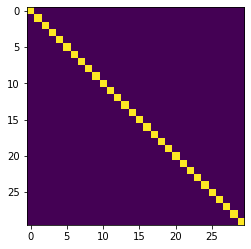

In [224]:
plt.imshow(K)

## Matvec Toeplitz

In [276]:
np.fft.ifft(np.fft.fft(K[:,0]) * np.fft.fft(v)))

array([1.30018918e-03, 4.66255716e-03, 6.68808496e-03, 1.79879083e-02,
       3.49406031e-02, 1.54214300e-01, 2.50588013e-01, 2.47896218e-01,
       6.38947802e-01, 6.47542864e-01, 1.25037658e+00, 9.60841316e-01,
       2.21825345e+00, 2.04433873e+00, 1.03293182e+00, 0.00000000e+00,
       5.82184352e-02, 7.39214468e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [277]:
u

array([3.11590194e+02, 3.47557090e+02, 1.55070260e+02, 1.29727530e+02,
       7.83802473e+01, 1.07603310e+02, 5.43858631e+01, 1.67347946e+01,
       1.34165426e+01, 4.22930012e+00, 2.54018626e+00, 6.07157205e-01,
       4.51494292e-01, 1.58139294e-01, 5.35049540e-02, 0.00000000e+00,
       5.82859592e-03, 6.97291571e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [292]:
p / np.abs(np.fft.ifft(
        np.fft.fft(np.hstack([K[:,0], K[0,:0:-1]])) 
        * np.fft.fft(np.pad(v,(0, sum(K.shape) - 1 - v.shape[0])))))[:u.shape[0]]

array([3.11590194e+02, 3.47557090e+02, 1.55070260e+02, 1.29727530e+02,
       7.83802473e+01, 1.07603310e+02, 5.43858631e+01, 1.67347946e+01,
       1.34165426e+01, 4.22930012e+00, 2.54018626e+00, 6.07157205e-01,
       4.51494292e-01, 1.58139294e-01, 5.35049540e-02, 0.00000000e+00,
       5.82859592e-03, 6.97291571e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [290]:
u

array([3.11590194e+02, 3.47557090e+02, 1.55070260e+02, 1.29727530e+02,
       7.83802473e+01, 1.07603310e+02, 5.43858631e+01, 1.67347946e+01,
       1.34165426e+01, 4.22930012e+00, 2.54018626e+00, 6.07157205e-01,
       4.51494292e-01, 1.58139294e-01, 5.35049540e-02, 0.00000000e+00,
       5.82859592e-03, 6.97291571e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [293]:
np.divide(p, K.dot(v))

array([3.11590194e+02, 3.47557090e+02, 1.55070260e+02, 1.29727530e+02,
       7.83802473e+01, 1.07603310e+02, 5.43858631e+01, 1.67347946e+01,
       1.34165426e+01, 4.22930012e+00, 2.54018626e+00, 6.07157205e-01,
       4.51494292e-01, 1.58139294e-01, 5.35049540e-02, 0.00000000e+00,
       5.82859592e-03, 6.97291571e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [294]:
q / np.abs(np.fft.ifft(
        np.fft.fft(np.hstack([K[:,0], K[0,:0:-1]])) 
        * np.fft.fft(np.pad(u,(0, sum(K.shape) - 1 - u.shape[0])))))[:v.shape[0]]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.18603357e-02, 2.17112738e-01, 7.69822301e-01, 1.37765096e+00,
       7.36481650e+00, 8.73426825e+00, 3.71944178e+01, 3.51003776e+01,
       1.32165684e+02, 1.80553962e+02, 3.23738721e+02, 3.99075415e+02,
       7.15554305e+02, 3.49911965e+02, 1.25480550e+03, 1.12495213e+03,
       6.72357748e+02, 2.41111561e+03])

In [295]:
v

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.18603357e-02, 2.17112738e-01, 7.69822301e-01, 1.37765096e+00,
       7.36481650e+00, 8.73426825e+00, 3.71944178e+01, 3.51003776e+01,
       1.32165684e+02, 1.80553962e+02, 3.23738721e+02, 3.99075415e+02,
       7.15554305e+02, 3.49911965e+02, 1.25480550e+03, 1.12495213e+03,
       6.72357748e+02, 2.41111561e+03])